- survival  :      Survival<br>
                (0 = No; 1 = Yes)
- pclass     :     Passenger Class<br>
                (1 = 1st; 2 = 2nd; 3 = 3rd)
- name:            Name
- sex:            Sex
- age:            Age
- sibsp     :      Number of Siblings/Spouses Aboard
- parch      :     Number of Parents/Children Aboard
- ticket      :    Ticket Number
- fare        :   Passenger Fare
- cabin        :   Cabin
- embarked      :  Port of Embarkation<br>
                (C = Cherbourg; Q = Queenstown; S = Southampton)

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# sklearn as needed

In [111]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
## factorize sex (male=1, female=0)
from sklearn.preprocessing import LabelEncoder
# train['Gender'] = train['Sex'].map({'male':0,'female':1})
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [114]:
## factorize in test data
test['Sex'] = le.fit_transform(test['Sex'])
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S


In [115]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [116]:
train_y = train['Survived']
train_x = train.drop(['Survived'],1)

In [117]:
train_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


##### Looking at NaNs

In [118]:
# import random
# random.seed(7)

train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***
##### Dealing with NaNs:
 - Embarked: we can fill with most common since only 2 samples with NA
 - Age: will have to investigate age distribution, maybe based on gender
 - Cabin: probably will drop as most are NA and probably would not factor much into survival.<br><br>
 Let's go!
***

In [119]:
train_x['Embarked'].value_counts()
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
# train_x['Embarked'] = imp.fit_transform(train_x['Embarked'])

In [120]:
train_x[train_x['Embarked'].isnull()]# = 'S'
# train_x.isnull().sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [121]:
train_x.loc[train_x['Embarked'].isnull(), 'Embarked'] = train_x['Embarked'].dropna().mode().values
# train_x.loc[train_x['Embarked'].isnull(), 'Embarked'] = 'S'
train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

And let's break the embarkadation location into their own features, using one-hot encoding

In [122]:
## dummy variables from pandas
train_x[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = pd.get_dummies(train_x['Embarked'])
# train_x.drop(['Embarked'], 1)
train_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


In [123]:
test[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = pd.get_dummies(test['Embarked'])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0.0,0.0,1.0


Alright took care of those two. Now let's take a look at Age!

In [124]:
# train.Age = train.Age.dtype(int)
# plt.hist(train_x['Age'])
# plt.show()
train_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


In [125]:
imp = Imputer(missing_values='NaN', axis=0)
# train_x[train_x['Age']=='S']='NaN'#.value_counts())
age = imp.fit_transform(train_x['Age'].reshape(-1,1))
print(train_x['Age'].isnull().sum() / len(train_x.Age))
print(age.mean(), train_x['Age'].mean())

0.198653198653
29.6991176471 29.6991176471


#### Age
Almost 20% missing, replacing with mean introduces a ton of bias, will have to do something more creative
***

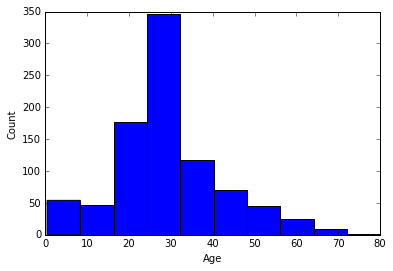

Mean: 29.699118


In [126]:
# if replaced with mean this is dist. 
plt.hist(age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print('Mean: %f' % age.mean())

In [127]:
# plt.hist(train_x['Age'].dropna())
# plt.show()

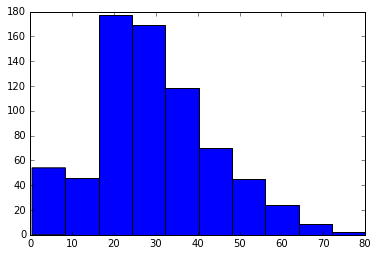

Mean: 29.699118


In [128]:
plt.hist(train_x['Age'].dropna())#.value_counts()
plt.show()
print('Mean: %f' % train_x['Age'].mean())

In [129]:
## mean age by sex
male_mean_age = train_x.loc[train_x['Sex']==1, 'Age'].dropna().mean()
female_mean_age = train_x.loc[train_x['Sex']==0, 'Age'].dropna().mean()
print('Male Mean Age: %.4f\nFemale Mean Age: %.4f' %
     (male_mean_age, female_mean_age))

Male Mean Age: 30.7266
Female Mean Age: 27.9157


Setting age based on gender might be good starting point, let's dig some more!

In [130]:
## splitting into male/female to further investigate
female = train_x.loc[train_x['Sex']==0,:]
male = train_x.loc[train_x['Sex']==1,:]

***
## age by class
- 1 = 1st; 2 = 2nd; 3 = 3rd<br>
I expect first class to be older, let's check
***

In [131]:
female.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0


In [132]:
first_class_female_age = female.loc[female['Pclass']==1, 'Age'].median()
second_class_female_age = female.loc[female['Pclass']==2, 'Age'].median()
third_class_female_age = female.loc[female['Pclass']==3, 'Age'].median()
print('First class median age(f); %.4f\nSecond class median age(f): %.4f\nThird class median age(f): %.4f' %
     (first_class_female_age, second_class_female_age, third_class_female_age))

First class median age(f); 35.0000
Second class median age(f): 28.0000
Third class median age(f): 21.5000


***
As expected Age differ significantly between pclass for female passengers, let's check for males
***

In [133]:
first_class_male_age = male.loc[male['Pclass']==1, 'Age'].median()
second_class_male_age = male.loc[male['Pclass']==2, 'Age'].median()
third_class_male_age = male.loc[male['Pclass']==3, 'Age'].median()
print('First class median age(m); %.4f\nSecond class median age(m): %.4f\nThird class median age(m): %.4f' %
     (first_class_male_age, second_class_male_age, third_class_male_age))

First class median age(m); 40.0000
Second class median age(m): 30.0000
Third class median age(m): 25.0000


<br>
Wow, the male passenger age is even more representated by class. It differs enough between gender that I will include both in replacing missing values.<br>
One more thing I want to check is based on embarkadation location.<br>
(C = Cherbourg; Q = Queenstown; S = Southampton)<br>

In [134]:
s_female_age = female.loc[female['Embarked']=='S', 'Age'].median()
q_female_age = female.loc[female['Embarked']=='Q', 'Age'].median()
c_female_age = female.loc[female['Embarked']=='C', 'Age'].median()
print('Southampton mean age(f); %.4f\nQueenstown mean age(f): %.4f\nCherbourg mean age(f): %.4f' %
     (s_female_age, q_female_age, c_female_age))

Southampton mean age(f); 27.5000
Queenstown mean age(f): 21.5000
Cherbourg mean age(f): 24.0000


##### not really useful

In [135]:
s_female_age = train_x.loc[train_x['Embarked']=='S', 'Age'].median()
q_female_age = train_x.loc[train_x['Embarked']=='Q', 'Age'].median()
c_female_age = train_x.loc[train_x['Embarked']=='C', 'Age'].median()
print('Southampton median age(f); %.4f\nQueenstown median age(f): %.4f\nCherbourg median age(f): %.4f' %
     (s_female_age, q_female_age, c_female_age))

Southampton median age(f); 28.0000
Queenstown median age(f): 27.0000
Cherbourg median age(f): 29.0000


Now let's take a look at the distibution of passenger class amoung the people with NAs for their age.

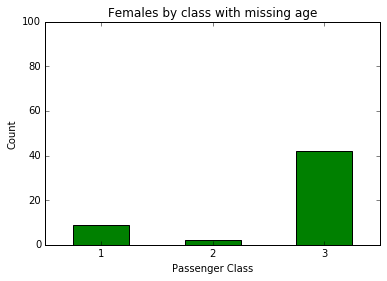

In [136]:
plt.hist(train_x.loc[train_x['Age'].isnull(), 'Pclass'][train_x['Sex']==0],
         color='g', bins=np.arange(6)-0.5, rwidth=.5)
plt.title('Females by class with missing age')
plt.xlim(0.5,3.5,1)
plt.ylim(0,100,5)
plt.xticks([1,2,3])
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

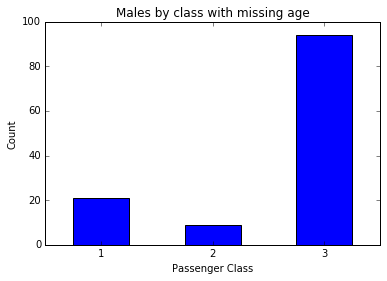

In [137]:
plt.hist(train_x.loc[train_x['Age'].isnull(), 'Pclass'][train_x['Sex']==1],
         color='b', bins=np.arange(6)-0.5, rwidth=.5)
plt.title('Males by class with missing age')
plt.xlim(0.5,3.5,1)
plt.ylim(0,100,5)
plt.xticks([1,2,3])
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

### Fill NAs in age
Alright now we will fill our missing ages, using already known median ages for sex/gender

In [138]:
def median_age(sex, pclass):
    return round(train_x.loc[train_x['Pclass']==pclass, 'Age'][train_x['Sex']==sex].median())

In [139]:
# # # female=0, male=1
# fe_c1 = median_age(1, 0)
# fe_c2 = median_age(2,0)
# fe_c3 = median_age(3,0)

# m_c1 = median_age(1,1)
# m_c2 = median_age(2,1)
# m_c3 = median_age(3,1)

In [140]:
# def replace_age(df,sex,pclass):
#     return df.loc[df['Age'].isnull(), 'Age'][df['Sex']==sex][df['Pclass']==pclass].fillna(median_age(df, sex, pclass),
#                                                                                           inplace=True)

In [141]:
## a hackish
sex = train_x['Sex'].unique()
pclass = train['Pclass'].unique()
sex_pclass = [(s,cls) for s in sex for cls in pclass]

In [142]:
sex_pclass

[(1, 3), (1, 1), (1, 2), (0, 3), (0, 1), (0, 2)]

In [143]:
# for (sex, pclass) in sex_pclass:
#     x1 = replace_age(train_x, sex, pclass)
#     print(median_age(train_x, sex, pclass))

In [144]:
# train_x.loc[train_x['Age'].isnull(), 'Age'][train_x['Sex']==1][train_x['Pclass']==1] = median_age(1,1)
train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [145]:
for (sex, pclass) in sex_pclass:
    med_age=median_age(sex,pclass)
    idx = train_x.loc[train_x['Age'].isnull(), 'Age'][train_x['Sex']==sex][train_x['Pclass']==pclass].index
    for i in idx:
        train_x.set_value(i, 'Age', med_age)

In [146]:
## do same thing to test data
def median_age_test(sex, pclass):
    return round(test.loc[test['Pclass']==pclass, 'Age'][test['Sex']==sex].median())

for (sex, pclass) in sex_pclass:
    med_age=median_age_test(sex,pclass)
    idx = test.loc[test['Age'].isnull(), 'Age'][test['Sex']==sex][test['Pclass']==pclass].index
    for i in idx:
        test.set_value(i, 'Age', med_age)

In [147]:
train_x.isnull().sum()
# median_age(0,1)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

*** 
Finally! Let's check out df now with ages replaced!

In [148]:
print('New average age: %.5f' % train_x['Age'].mean())
print('Before repalcement average age: %.5f' % train['Age'].dropna().mean())

New average age: 29.13599
Before repalcement average age: 29.69912


***
So our passengers got younger! Still have nulls in Cabin, but feature seems irrelevant.<br>
Also going to drop Ticket, and Fare since probably highly correlated with Pclass.<br>
Dataset now cleaned. Let's look at feature engineering!
***

In [149]:
# train_x = train_x.drop(['Cabin', 'Ticket', 'Fare', 'Embarked', 'Name'],axis=1);
# train_x = train_x.drop('Name', axis=1)

In [150]:
train_x.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0


***
Investigating 'Name' Category
***

In [151]:
names = train_x['Name']
names[:25]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [152]:
## check out title counts
## parse names
import re

names = names.map(lambda x: re.search('[A-Z][a-z]{1,3}\.', x))
names = [i.group() for i in names if i is not None]

In [153]:
pd.Series(names).value_counts()

Mr.      517
Miss.    182
Mrs.     125
Dr.        7
Rev.       6
Mlle.      2
Col.       2
Ms.        1
Capt.      1
Sir.       1
Mme.       1
Don.       1
Lady.      1
dtype: int64

In [154]:
one = train.loc[:, ('Name', 'Survived', 'Sex')]
one.head(2)

,Name,Survived,Sex
0,"Braund, Mr. Owen Harris",0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0


In [155]:
def title_getter(df):
    title = df['Name'].map(lambda x: re.search('[A-Z][a-z]+\.',x))
    for idx,tit in enumerate(title):
        if tit is not None:
            df.loc[idx, 'Title'] = tit.group()
        else:
            df.loc[idx, 'Title'] = None
    return df
# one['Title'] = tit

In [156]:
one = title_getter(train)
one.head()
one['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Countess.      1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Lady.          1
Ms.            1
Jonkheer.      1
Name: Title, dtype: int64

In [157]:
## distribution of title that survived
one.loc[one['Survived']==1, ('Title')].value_counts()

Miss.        127
Mrs.          99
Mr.           81
Master.       23
Dr.            3
Mlle.          2
Mme.           1
Col.           1
Major.         1
Lady.          1
Ms.            1
Countess.      1
Sir.           1
Name: Title, dtype: int64

***
This gives us a little more information on passenger, more than pclass and sex. Will it be useful?
***

In [158]:
train_x = title_getter(train_x)
train_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,Mr.
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,Mrs.
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,Miss.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,Mrs.
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,Mr.


In [159]:
train_x = train_x.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,22.0,1,0,0.0,0.0,1.0,Mr.
1,1,0,38.0,1,0,1.0,0.0,0.0,Mrs.
2,3,0,26.0,0,0,0.0,0.0,1.0,Miss.
3,1,0,35.0,1,0,0.0,0.0,1.0,Mrs.
4,3,1,35.0,0,0,0.0,0.0,1.0,Mr.


### Dummies for titles

In [160]:
a = pd.get_dummies(train_x['Title']).astype(int)
train_x = pd.concat([train_x, pd.get_dummies(train_x['Title']).astype(int)], axis=1)

In [161]:
del train_x['Title']
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Capt.,Col.,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,3,1,22.0,1,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,38.0,1,0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,26.0,0,0,0.0,0.0,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,35.0,1,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,1,35.0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [162]:
# train_x.head(2)
train_x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.',
       'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.',
       'Ms.', 'Rev.', 'Sir.'],
      dtype='object')

In [163]:
# test['Sir'].value_counts()

In [164]:
train_x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Capt.,Col.,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,3,1,22.0,1,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,38.0,1,0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [165]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0.0,0.0,1.0


In [166]:
train_x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Capt.,Col.,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,3,1,22.0,1,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,38.0,1,0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [167]:
from sklearn.cross_validation import train_test_split
tr_x, test_x, tr_y, test_y = train_test_split(train_x, train_y,
                                              test_size=0.1,
                                              random_state=1)

In [168]:
## quick baseline logistic reg
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=1)
logr.fit(tr_x,tr_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
pred = logr.predict(test_x)

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred)

0.76666666666666672

In [171]:
## looking at misclassified samples
a = (pred!=test_y).map({False: None, True: 1}).dropna()

In [172]:
idxs = a.index

In [173]:
miss = test_x.loc[idxs]
miss["Survived"] = pd.DataFrame(test_y).loc[idxs]
miss.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Capt.,Col.,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,Survived
680,3,0,22.0,0,0,0.0,1.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
17,2,1,30.0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,1
430,1,1,28.0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,1
111,3,0,14.5,1,0,1.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
821,3,1,27.0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,1


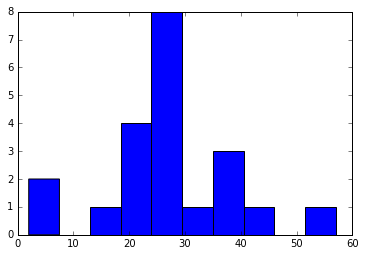

(20, 30]    11
(30, 40]     3
(10, 20]     3
(0, 10]      2
(50, 60]     1
(40, 50]     1
(60, 70]     0
Name: Age, dtype: int64


In [174]:
plt.hist(miss['Age'])
plt.show()
print(pd.cut(miss['Age'], [0,10,20,30,40,50,60,70]).value_counts())

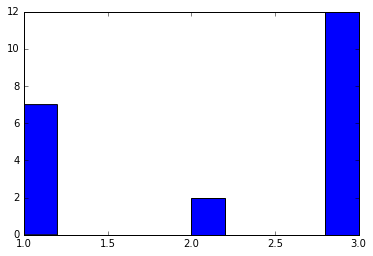

3    12
1     7
2     2
Name: Pclass, dtype: int64

In [175]:
plt.hist(miss['Pclass'])
plt.show()
miss.Pclass.value_counts()

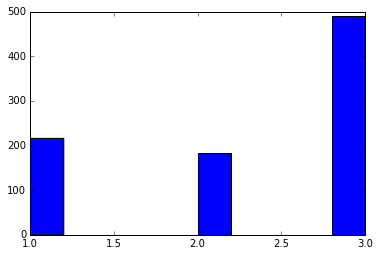

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [176]:
plt.hist(train_x['Pclass'])
plt.show()
train_x.Pclass.value_counts()

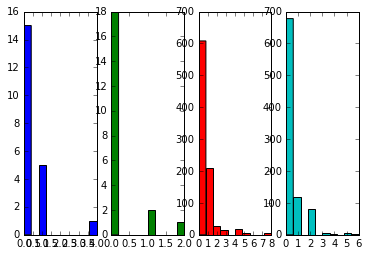

In [177]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4)
ax1.hist(miss['SibSp'], color='b')
ax2.hist(miss['Parch'], color='g')
ax3.hist(train_x['SibSp'], color='r')
ax4.hist(train_x['Parch'], color='c')
plt.show()

In [178]:
## random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=1)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [179]:
pred = rf.predict(test_x)
accuracy_score(test_y, pred)

0.90000000000000002

In [180]:
# ## SVM with grid search
# from sklearn.grid_search import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# pipe_svc = Pipeline([
#         ('scl', StandardScaler()),
#         ('clf', SVC(random_state=1))
#     ])
# param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
# param_grid = [#{'clf__C': param_range,
#               #'clf__kernel': ['linear']},
#              {'clf__C': param_range,
#              'clf__gamma': param_range,
#              'clf__kernel': ['rbf']}]
# gs = GridSearchCV(estimator=pipe_svc,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=10,
#                  n_jobs=-1)
# gs = gs.fit(train_x, train_y)
# print(gs.best_score_)
# print(gs.best_params_)

In [181]:
## use independent test data to estimate performance
## from the best selected model via best_estimator_
# clf = gs.best_estimator_
# clf.fit(train_x, train_y)
# print('Test accuracy: %.3f' % clf.score(test_x, test_y))

In [182]:
test.head()
print(train_x.columns)
print(test.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.',
       'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.',
       'Ms.', 'Rev.', 'Sir.'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [183]:
test = test.drop(['Ticket','Fare','Cabin','Embarked'], axis=1)

In [184]:
test = title_getter(test)
a = pd.get_dummies(test['Title']).astype(int)
test = pd.concat([test, a], axis=1)
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Title,Col.,Dona.,Dr.,Master.,Miss.,Mr.,Mrs.,Ms.,Rev.
0,892,3,"Kelly, Mr. James",1,34.5,0,0,0.0,1.0,0.0,Mr.,0,0,0,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,0.0,0.0,1.0,Mrs.,0,0,0,0,0,0,1,0,0


In [185]:
del test['Name']
del test['Title']
# pred = clf.predict(test)
# test.isnull().sum()

In [186]:
ids = test['PassengerId'].values
del test['PassengerId']
test.head(2)
# len(pred)

# len()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Col.,Dona.,Dr.,Master.,Miss.,Mr.,Mrs.,Ms.,Rev.
0,3,1,34.5,0,0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0
1,3,0,47.0,1,0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0


In [187]:
for i in train_x.columns:
    if i not in test.columns:
        test[i] = 0

In [188]:
for i in test.columns:
    if i not in train_x.columns:
        print(i)

Dona.


In [189]:
del test['Dona.']
test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Col.,Dr.,...,Rev.,Capt.,Countess.,Don.,Jonkheer.,Lady.,Major.,Mlle.,Mme.,Sir.
0,3,1,34.5,0,0,0.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,47.0,1,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
### SVM Grid/param search ~ 77.512 accuaracy
# ids = test['PassengerId'].values
# res = pd.DataFrame()
# res['PassengerId'] = ids
# res['Survived'] = pred

# res.head()

In [191]:
# res.to_csv('my_predictions0.csv', index=False)

In [192]:
## random forest
pred = rf.predict(test)
res1 = pd.DataFrame()
res1['PassengerId'] = ids
res1['Survived'] = pred

res1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [193]:
res1.to_csv('output/my_predictions_titles1.csv', index=False)

In [194]:
ol = pd.read_csv('output/my_predictions_titles.csv')

In [195]:
counter = 0
for i,lab in enumerate(ol['Survived']):
    if res1.loc[i,'Survived'] == lab:
        counter += 1

In [196]:
print(counter)
len(ol['Survived'])

386


418

In [197]:
rf.feature_importances_[0]

0.10822966594830441

In [198]:
feature_names = train_x.columns
importances = rf.feature_importances_
important_names = feature_names[importances > np.mean(importances)]
print(importances)

[  1.08229666e-01   1.94251462e-01   3.30187214e-01   7.99795859e-02
   4.41940524e-02   2.20464776e-02   1.38020897e-02   9.72319790e-03
   4.30284931e-04   7.98454029e-04   4.67837548e-06   1.31568892e-03
   2.47834166e-03   8.69683393e-04   8.25773457e-06   1.13376230e-03
   1.91009633e-02   3.72718796e-02   4.69632751e-04   2.65748554e-06
   8.67017376e-02   3.94433847e-02   1.17901144e-03   4.90844266e-03
   1.46939394e-03]


In [199]:
train_x.head(1)

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Capt.,Col.,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,3,1,22.0,1,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


Feature ranking:
1. feature 2 (0.330187)
2. feature 1 (0.194251)
3. feature 0 (0.108230)
4. feature 20 (0.086702)
5. feature 3 (0.079980)
6. feature 4 (0.044194)
7. feature 21 (0.039443)
8. feature 17 (0.037272)
9. feature 5 (0.022046)
10. feature 16 (0.019101)
11. feature 6 (0.013802)
12. feature 7 (0.009723)
13. feature 23 (0.004908)
14. feature 12 (0.002478)
15. feature 24 (0.001469)
16. feature 11 (0.001316)
17. feature 22 (0.001179)
18. feature 15 (0.001134)
19. feature 13 (0.000870)
20. feature 9 (0.000798)
21. feature 18 (0.000470)
22. feature 8 (0.000430)
23. feature 14 (0.000008)
24. feature 10 (0.000005)
25. feature 19 (0.000003)


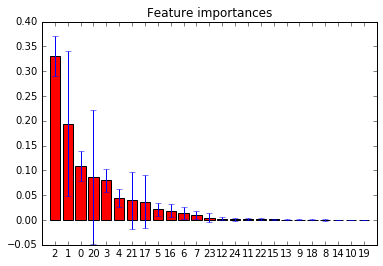

In [200]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

In [201]:
print('Rankings:')
for i,ind in enumerate(indices):
    print(' %d. %s' % (i+1,train_x.columns[ind]))

Rankings:
 1. Age
 2. Sex
 3. Pclass
 4. Mr.
 5. SibSp
 6. Parch
 7. Mrs.
 8. Miss.
 9. Embarked_C
 10. Master.
 11. Embarked_Q
 12. Embarked_S
 13. Rev.
 14. Dr.
 15. Sir.
 16. Don.
 17. Ms.
 18. Major.
 19. Jonkheer.
 20. Col.
 21. Mlle.
 22. Capt.
 23. Lady.
 24. Countess.
 25. Mme.


In [202]:
for i in indices[10:]:
    del train_x[train_x.columns[i]]
    del test[test.columns[i]]

IndexError: index 23 is out of bounds for axis 0 with size 23

In [ ]:
train_x.columns